# Predicting Fraud in Credit Card Payment Services

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. A transaction either is fraudulent, or it is genuine.

The datasets contains transactions made by credit cards in September 2013 by the European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a Principal Component Analysis(PCA) transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not being provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The optimal solution can be evaluated by using different algorithms to do the predictions. The highest predictive power model is further used for getting the prediction results. We have worked on different algorithms like Logistic Regression, K Nearest Neighbor Classifier, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, XGBoost Classifier and Light Gradient Boosting Classifier. We found that the algorithm that best suits for prediction is Light Gradient Boosting Classifier with an predictive accuracy of 98.16%. Crucially, these results were obtained without artificial balancing of the data, such as SMOTE (Synthetic Minority Over-sampling Technique), making this approach suitable to real-world applications!


## Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import sklearn
import random
from sklearn.utils import shuffle
%matplotlib inline

## Downloading and combining the data
The data consists of over 284,807 rows in csv. Next, data is imported and concatenated into one dataframe.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ea62c42fd3654f048e5b992fc153c912 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='60m4RKQ57G3u_NwyGTSgt_XiF6uw4HzyO4JXByfWxHfR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')
body = client_ea62c42fd3654f048e5b992fc153c912.get_object(Bucket='creditcardspaymentsfinancialfraud-donotdelete-pr-474yvyfjbryswd',Key='creditcard.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )
d = pd.read_csv(body)
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis(EDA) for all the dataset features
A distance plot for every column of the dataset is plotted.

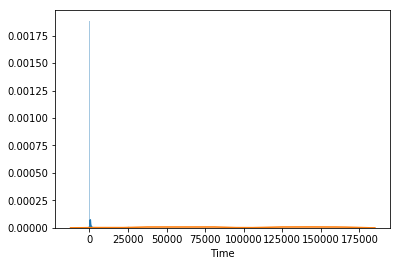

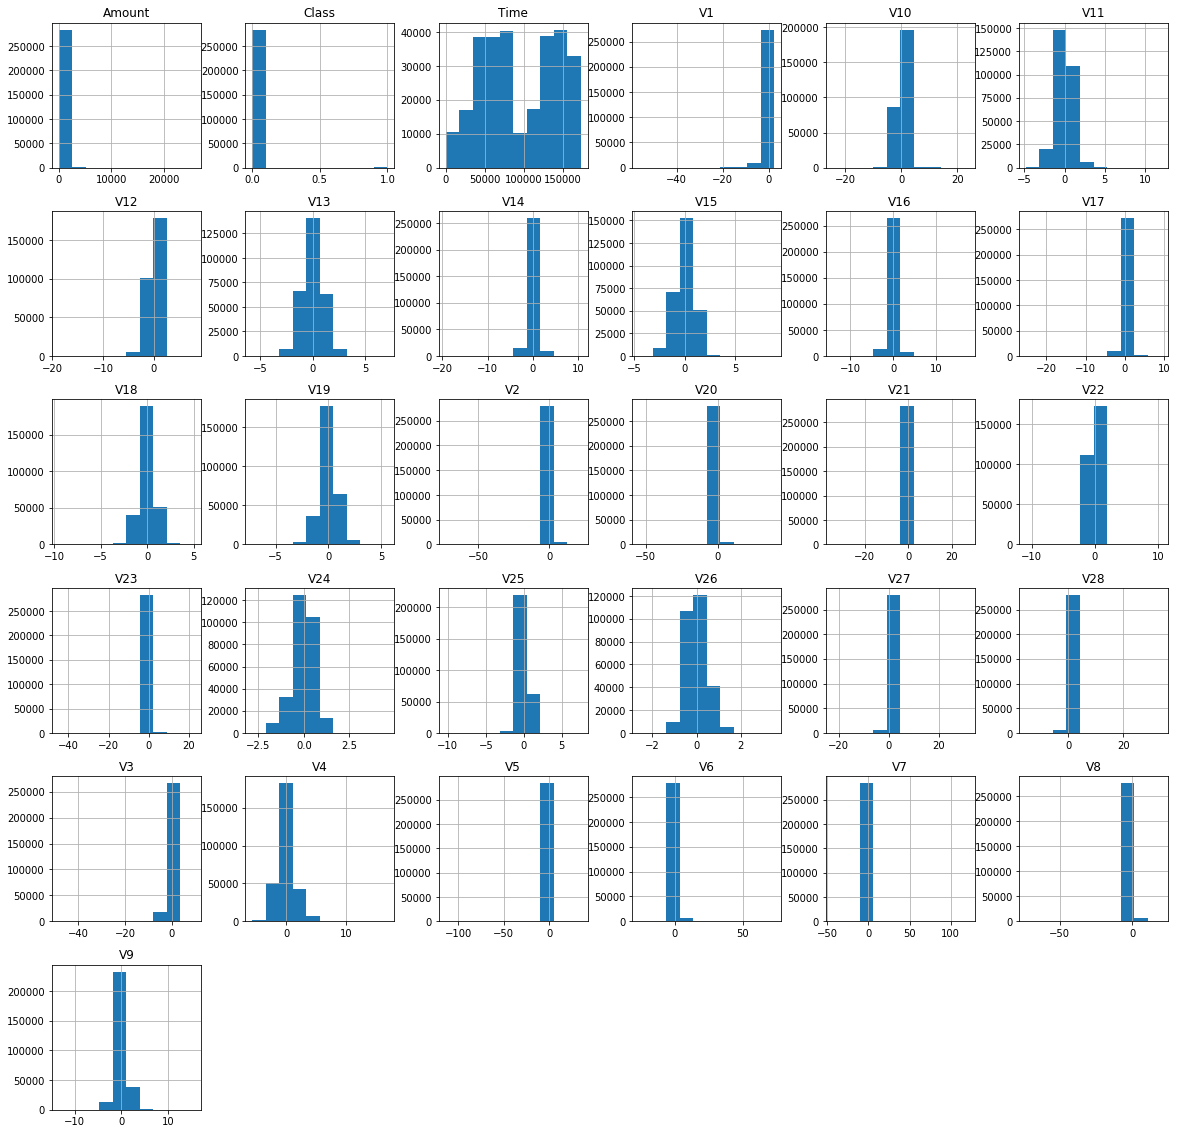

In [3]:
asns.distplot(d['Amount'])
sns.distplot(d['Time'])
d.hist(figsize=(20,20))
plt.show()

Visualizing transactions over Time plotting the Amount of money in the transactions.

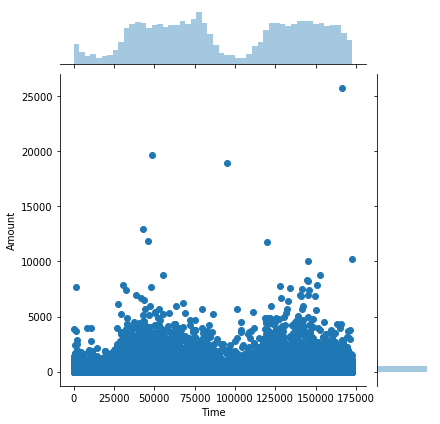

In [4]:
sns.jointplot(x= 'Time', y= 'Amount', data= d)

## Highlighting the fraudulent transactions from the data
Feature 'Class' is the target variable and it takes value 1 in case of fraud and 0 otherwise. So pointing out such fraudulent and genuine transactions. The Class 0 transactions are "Genuine" while Class 1 are "Fraudulent".


In [5]:
class0 = d[d['Class']==0]
print("No of rows in Class 0 ie. Genuine transactions: ",len(class0))
class0

No of rows in Class 0 ie. Genuine transactions:  284315


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
class1 = d[d['Class']==1]
print("No of rows in Class 1 ie. Fraudulent transactions: ",len(class1))
class1

No of rows in Class 1 ie. Fraudulent transactions:  492


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


## Concatenation of shuffled Class 0 and 1 transactions
We are creating a dataframe of the shuffled class 0 and 1 transactions and are then putting them all together into a new csv file. Now using these new dataframe we are able to separate out the Class 0 and 1 transactions widely and visualize them.

In [7]:
temp = shuffle(class0)
d1 = temp.iloc[:2000,:]
d1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
234382,147952.0,1.880373,1.239687,-1.597576,4.187659,1.002418,-0.797426,0.563523,-0.249379,-1.253793,...,-0.404718,-1.106214,0.290629,-0.242788,-0.224871,-0.348902,0.001416,0.022424,17.35,0
98925,66874.0,-0.494374,0.997750,1.569409,-0.205361,0.221712,-0.083427,0.570217,0.184462,-0.750625,...,-0.142266,-0.318386,-0.013231,0.015205,-0.276522,0.081565,0.282082,0.108569,2.97,0
216643,140566.0,1.116460,-1.875619,-3.334300,0.812124,0.527096,-0.459457,1.502082,-0.734740,-1.581806,...,0.270584,0.144393,-0.726956,0.099129,0.696580,-0.248899,-0.133767,0.031793,597.58,0
5270,5111.0,-0.694591,1.005518,1.804310,-0.186807,0.091807,-0.593637,0.754584,-0.284532,1.860536,...,-0.262069,0.045704,-0.222298,0.386760,-0.061903,0.293265,0.245781,0.025938,5.00,0
243772,152064.0,0.212605,0.217771,1.149803,-0.655725,0.180006,0.230971,0.238575,0.038338,0.676712,...,0.258904,1.032253,-0.125286,0.782008,-0.351414,-0.370564,-0.090057,-0.210021,9.99,0
116325,74229.0,0.050008,-2.181216,-0.079120,0.485044,-1.139715,0.427269,0.195648,0.112820,0.468525,...,0.332593,-0.287033,-0.526538,-0.212360,-0.040109,0.986381,-0.162600,0.092152,595.00,0
16573,27935.0,1.260603,-0.098359,-1.568343,-0.506701,2.249092,3.100053,-0.208424,0.682679,-0.235100,...,-0.086972,-0.462029,-0.130428,1.040453,0.712993,0.378491,-0.057442,0.006191,45.00,0
240955,150821.0,0.916877,-2.260875,-0.672569,1.015205,-1.174696,0.541876,-0.139237,0.024563,1.834859,...,0.141151,-0.422346,-0.181193,0.614543,-0.435779,-0.561981,-0.036244,0.070375,547.41,0
22899,32493.0,1.196989,0.248972,0.259830,0.654390,-0.231028,-0.610163,-0.009089,-0.043116,0.092392,...,-0.259920,-0.754806,0.156745,0.022665,0.125841,0.124674,-0.010928,0.027923,9.99,0
255101,157064.0,1.844602,-0.051082,-1.690806,1.465939,0.359141,-1.108321,0.791471,-0.461617,0.144801,...,0.111221,0.348694,-0.089532,0.005502,0.433262,-0.500659,-0.030705,-0.044763,103.99,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 234382 to 281674
Data columns (total 31 columns):
Time      2492 non-null float64
V1        2492 non-null float64
V2        2492 non-null float64
V3        2492 non-null float64
V4        2492 non-null float64
V5        2492 non-null float64
V6        2492 non-null float64
V7        2492 non-null float64
V8        2492 non-null float64
V9        2492 non-null float64
V10       2492 non-null float64
V11       2492 non-null float64
V12       2492 non-null float64
V13       2492 non-null float64
V14       2492 non-null float64
V15       2492 non-null float64
V16       2492 non-null float64
V17       2492 non-null float64
V18       2492 non-null float64
V19       2492 non-null float64
V20       2492 non-null float64
V21       2492 non-null float64
V22       2492 non-null float64
V23       2492 non-null float64
V24       2492 non-null float64
V25       2492 non-null float64
V26       2492 non-null float64
V27       2492 non-nul

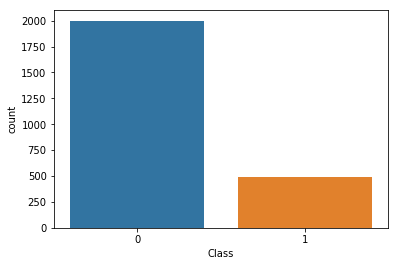

In [8]:
frames = [d1, class1]
df_temp = pd.concat(frames)
df_temp.info()
df = shuffle(df_temp)
df.to_csv('creditcardsampling.csv')
sns.countplot('Class', data=df)

In [9]:
!pip install scikit-learn==0.22.1

## SMOTE 
SMOTE, an oversampling technique is used here to generate synthetic samples. It is used here to obtain a synthetically class-balanced or nearly class-balanced training set, which is then used to train the classifier.

In [10]:
"""# SMOTE"""

!pip install --user imblearn

import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X = df.iloc[ : ,:-1]
Y = df.iloc[: , -1]
X,Y = oversample.fit_resample(X,Y)

Using TensorFlow backend.


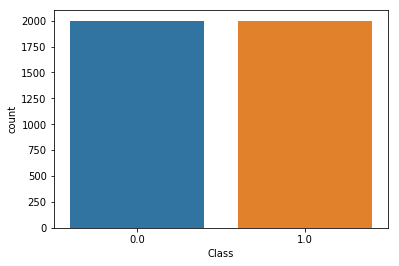

In [11]:
X = pd.DataFrame(X)
X.shape
Y=pd.DataFrame(Y)
Y.head()
names = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
data = pd.concat([X,Y],axis=1)
d = data.values
data = pd.DataFrame(d,columns=names)
sns.countplot('Class', data=data)

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,87434.638392,-2.483807,1.904046,-3.550508,2.275174,-1.600833,-0.697052,-2.878576,0.223767,-1.289114,...,0.387674,-0.008683,-0.005424,-0.042053,0.023555,0.033977,0.073134,0.050101,98.135209,0.500000
std,48093.226221,5.398113,3.658586,6.113265,3.112281,4.124340,1.743252,5.754815,5.063980,2.246657,...,2.917900,1.190883,1.062142,0.547049,0.616319,0.463671,0.975707,0.395601,239.690038,0.500063
min,24.000000,-30.552380,-25.223683,-31.103685,-5.401678,-22.105532,-13.450773,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.381159,-7.263482,-3.018642,0.000000,0.000000
25%,45478.153688,-3.109476,-0.065560,-5.141368,-0.078252,-1.796944,-1.549273,-3.120165,-0.197244,-2.313374,...,-0.173879,-0.508020,-0.234716,-0.372686,-0.299003,-0.268201,-0.067319,-0.053426,2.490000,0.000000
50%,79364.500000,-0.803214,1.032844,-1.438755,1.411453,-0.425234,-0.686539,-0.714046,0.163718,-0.750356,...,0.155750,0.008875,-0.032393,0.008698,0.030899,-0.003842,0.059908,0.043851,22.020000,0.500000
75%,134838.928239,0.792155,2.909956,0.331568,4.282604,0.425952,0.077905,0.208848,0.890973,0.117062,...,0.650606,0.526805,0.173747,0.359445,0.370055,0.303129,0.426904,0.214286,99.000000,1.000000
max,172704.000000,2.354123,22.057729,3.415008,12.114672,18.621686,7.801221,15.722654,20.007208,6.411048,...,27.202839,8.361985,13.944567,3.695503,2.208209,2.845301,3.778980,4.386337,5934.900000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
Time      4000 non-null float64
V1        4000 non-null float64
V2        4000 non-null float64
V3        4000 non-null float64
V4        4000 non-null float64
V5        4000 non-null float64
V6        4000 non-null float64
V7        4000 non-null float64
V8        4000 non-null float64
V9        4000 non-null float64
V10       4000 non-null float64
V11       4000 non-null float64
V12       4000 non-null float64
V13       4000 non-null float64
V14       4000 non-null float64
V15       4000 non-null float64
V16       4000 non-null float64
V17       4000 non-null float64
V18       4000 non-null float64
V19       4000 non-null float64
V20       4000 non-null float64
V21       4000 non-null float64
V22       4000 non-null float64
V23       4000 non-null float64
V24       4000 non-null float64
V25       4000 non-null float64
V26       4000 non-null float64
V27       4000 non-null float

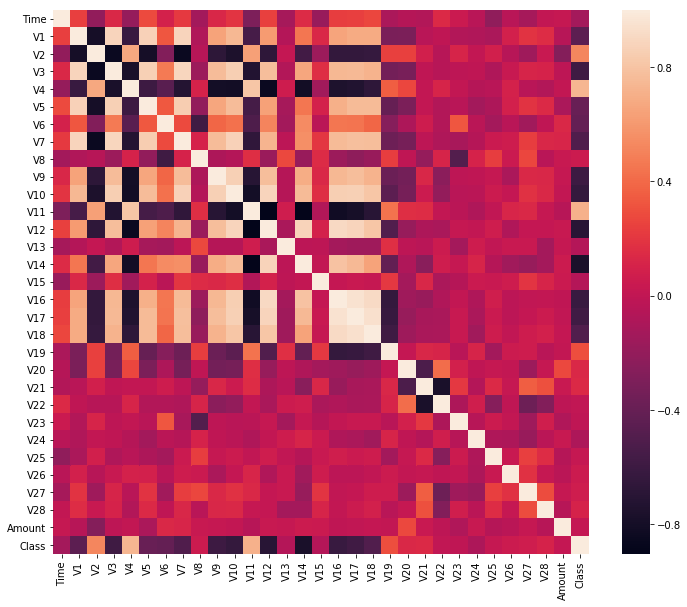

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

!pip install --user lightgbm

!pip install --user utils

## Feature Scaling
This technique is used here to standardize the independent features present in the data in a fixed range.

In [15]:
import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

"""# Feature Scaling"""
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']
scaler = StandardScaler()
frames= ['Time', 'Amount']
x= data[frames]
d_temp = data.drop(frames, axis=1)
temp_col=scaler.fit_transform(x)
scaled_col = pd.DataFrame(temp_col, columns=frames)
scaled_col.head()

,Time,Amount
0,0.207568,-0.342924
1,-0.530300,-0.363870
2,1.164371,-0.328070
3,-0.915787,-0.309836
4,0.062145,-0.172683


In [16]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.207568,-0.342924,1.957227,-0.534235,-0.039820,0.265181,-0.581426,0.481036,-1.171100,0.236336,...,-0.186071,-0.097474,0.011079,0.308829,0.302058,-0.602258,0.413570,-0.052708,-0.051023,0.0
1,-0.530300,-0.363870,-0.464848,0.969370,1.721637,1.244064,0.066072,-0.130505,0.787819,-0.227752,...,0.035048,0.025001,0.334167,-0.187221,0.555554,-0.192653,-0.353569,-0.269141,-0.082084,0.0
2,1.164371,-0.328070,-2.381866,1.118153,0.111868,-1.457102,-1.614759,-0.033641,-1.433242,1.689103,...,-0.855590,0.030825,-0.114406,-0.220142,0.471185,0.527261,0.230326,-0.819923,-0.240728,0.0
3,-0.915787,-0.309836,-0.674683,0.546085,1.802132,1.236373,0.550200,0.674637,0.235124,0.285027,...,0.197632,0.130239,0.558326,-0.240431,-0.263956,0.186453,-0.120361,0.150124,0.108619,0.0
4,0.062145,-0.172683,0.137351,2.622742,-1.346497,5.198609,2.207729,-0.010767,1.478465,-0.270531,...,0.382098,-0.274177,-0.416145,-0.091187,0.153178,-0.504569,0.309176,0.220146,0.310774,0.0


In [17]:
y = data['Class']
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.207568,-0.342924,1.957227,-0.534235,-0.039820,0.265181,-0.581426,0.481036,-1.171100,0.236336,...,-0.186071,-0.097474,0.011079,0.308829,0.302058,-0.602258,0.413570,-0.052708,-0.051023,0.0
1,-0.530300,-0.363870,-0.464848,0.969370,1.721637,1.244064,0.066072,-0.130505,0.787819,-0.227752,...,0.035048,0.025001,0.334167,-0.187221,0.555554,-0.192653,-0.353569,-0.269141,-0.082084,0.0
2,1.164371,-0.328070,-2.381866,1.118153,0.111868,-1.457102,-1.614759,-0.033641,-1.433242,1.689103,...,-0.855590,0.030825,-0.114406,-0.220142,0.471185,0.527261,0.230326,-0.819923,-0.240728,0.0
3,-0.915787,-0.309836,-0.674683,0.546085,1.802132,1.236373,0.550200,0.674637,0.235124,0.285027,...,0.197632,0.130239,0.558326,-0.240431,-0.263956,0.186453,-0.120361,0.150124,0.108619,0.0
4,0.062145,-0.172683,0.137351,2.622742,-1.346497,5.198609,2.207729,-0.010767,1.478465,-0.270531,...,0.382098,-0.274177,-0.416145,-0.091187,0.153178,-0.504569,0.309176,0.220146,0.310774,0.0


## Dimensionality Reduction
As we have a total of 31 columns here in the dataset, we need to reduce the number of input variables in a dataset as more input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality. So we are only limiting the data to the most important features only and adding the relevant features as the data is highly unbalanced.

In [18]:
"""# Dimensionality Reduction"""
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
X_temp_reduced = pca.fit_transform(d_scaled)
pca.explained_variance_ratio_
pca.explained_variance_
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-9.608083,0.453655,1.166204,0.411191,-1.281127,-1.400084,0.619454
1,-9.640880,0.541598,0.840335,-0.183773,-1.188291,-0.517669,-1.107043
2,-8.055873,1.425361,4.704864,-0.877695,-1.387107,-0.712151,-0.452055
3,-9.629788,0.455068,1.117287,-0.122368,-1.349857,-0.114223,-1.235395
4,-8.272223,0.018283,-1.015945,2.454935,6.318226,-0.465802,-0.440192


In [19]:
Y=d_scaled['Class']
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,-9.608083,0.453655,1.166204,0.411191,-1.281127,-1.400084,0.619454,0.0
1,-9.640880,0.541598,0.840335,-0.183773,-1.188291,-0.517669,-1.107043,0.0
2,-8.055873,1.425361,4.704864,-0.877695,-1.387107,-0.712151,-0.452055,0.0
3,-9.629788,0.455068,1.117287,-0.122368,-1.349857,-0.114223,-1.235395,0.0
4,-8.272223,0.018283,-1.015945,2.454935,6.318226,-0.465802,-0.440192,0.0


In [20]:
new_data.shape

(4000, 8)

Thus the new dataframe now contains only the relevant 4000 rows and 8 columns. The new data ready for training the model is now placed in a different csv file to be worked on for further analysis.

## Logistic Regression
We are using Logistic regression here as the target variable is a binary feature. A statistical model that uses a logistic function to model a binary dependent variable "Class" here in the data. In regression analysis, logistic regression (or logit regression) is estimating the parameters of the created logistic model (a form of binary regression).
For this regression model, we are getting a predictive accuracy of 96.91% which is quite a good one.

In [21]:
new_data.to_csv('finaldata.csv')
X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)
X_train.shape, X_test.shape
"""# Logistic Regression"""
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr
acc = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy: ",acc)
print()
from sklearn.metrics import classification_report,confusion_matrix
print("Logistic Regression Confusion Matrix: ")
print(confusion_matrix(y_test,y_pred_lr))

Logistic Regression Accuracy:  0.9691666666666666

Logistic Regression Confusion Matrix: 
[[610  10]
 [ 27 553]]


## Hyperparameter tuning
Parameters which define the model architecture are referred to as hyperparameters. Here we are now going to use different classification algorithms and build models, thus there is a need of a process of searching for the ideal model architecture which can be done with the help of hyperparameter tuning.

In [22]:
#Hyperparamter tuning 
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr= GridSearchCV(lr_model, param_grid = lr_params)
grid_lr.fit(X_train, y_train)
grid_lr.best_params_
y_pred_lr3=grid_lr.predict(X_test)
print("Classification Report:")
print(classification_report(y_test,y_pred_lr3))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/en

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       620
         1.0       0.98      0.96      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## Support Vector Classifier
We are using Support Vector classifier to fit the model to the data, returning a "best fit" hyperplane that divides, or categorizes the data. Here it is observed that SVC gives an accuracy of around 97.11% as per the classification report.

In [23]:
"""# Support Vector Classifier"""
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc
acc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier Accuracy: ",acc)
print()
print("Support Vector Classifier Classification report 1: ")
print(classification_report(y_test,y_pred_svc))
print()
print("Support Vector Classifier Confusion matrix: ")
print(confusion_matrix(y_test,y_pred_svc))
print()
from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)
print()
svc_param=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param.fit(X_train,y_train)
y_pred_svc2=svc_param.predict(X_test)
print("Support Vector Classifier Classification report 2: ")
print(classification_report(y_test,y_pred_svc2))

Support Vector Classifier Accuracy:  0.9641666666666666

Support Vector Classifier Classification report 1: 
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       620
         1.0       0.99      0.94      0.96       580

    accuracy                           0.96      1200
   macro avg       0.97      0.96      0.96      1200
weighted avg       0.97      0.96      0.96      1200


Support Vector Classifier Confusion matrix: 
[[614   6]
 [ 37 543]]

Best Accuracy: 97.11 %
Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Support Vector Classifier Classification report 2: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       620
         1.0       0.98      0.96      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## Decision Tree Classifier
This algorithm of classification is used to create the classification model by building a decision tree. Each node in the tree specifies a test on the attributes, each branch descending from that node corresponds to one of the possible values for that attribute. This is found to be giving an accuracy of 95.83%.

In [24]:
"""# Decision Tree Classifier"""
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)
acc = accuracy_score(y_test, y_pred_dtree)
print("Decision Tree Classifier Accuracy: ",acc)
print()
print("Decision Tree Classifier Classification Report 1: ")
print(classification_report(y_test,y_pred_dtree))
print()
print("Decision Tree Classifier Confusion matrix: ")
print(confusion_matrix(y_test,y_pred_dtree))
d_tree_param=DecisionTreeClassifier()
tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(d_tree_param,tree_parameters)
grid_tree.fit(X_train,y_train)
y_pred_dtree2=grid_tree.predict(X_test)
print()
print("Decision Tree Classifier Classification Report 2: ")
print(classification_report(y_test,y_pred_dtree2))

Decision Tree Classifier Accuracy:  0.9583333333333334

Decision Tree Classifier Classification Report 1: 
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       620
         1.0       0.95      0.96      0.96       580

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200


Decision Tree Classifier Confusion matrix: 
[[593  27]
 [ 23 557]]

Decision Tree Classifier Classification Report 2: 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       620
         1.0       0.97      0.95      0.96       580

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



## Random Forest Classifier
As above we have tried on Decision trees for classification, now we are trying to get more accuracy by the use of multiple decision trees which is provided by the Random Forest classifier. It aggregates the votes from different decision trees to decide the final type of the transaction as fraudulent or genuine of the "Class" test object from the data. As expected, Random Forest appears to give an improved accuracy of 96.91% than the Decision Tree classifier.

In [25]:
"""# Random Forest Classifier"""
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=5)
randomforest.fit(X_train,y_train)
y_pred_rf=randomforest.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy: ",acc)
print()
print("Random Forest Classifier Confusion matrix: ")
print(confusion_matrix(y_test,y_pred_rf))
print()
print("Random Forest Classifier Classification report: ")
print(classification_report(y_test,y_pred_rf))

Random Forest Classifier Accuracy:  0.9691666666666666

Random Forest Classifier Confusion matrix: 
[[603  17]
 [ 20 560]]

Random Forest Classifier Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       620
         1.0       0.97      0.97      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## K Nearest Neighbor Classifier
An object is classified by a plurality vote of its neighbors in KNN. The object is assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). As per the k value, the object is simply assigned to the class of that single nearest neighbor. Here we have tried giving two different values for k ie. 5 and 2. When k=5, we are getting an accuracy score of 97.25% whereas for k=2 which is a much smaller value for k, we are getting more accurate predictions as the accuracy comes out to be 97.26%.

In [26]:
"""# K Nearest Neighbors Classifier"""
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_pred_knn
acc = accuracy_score(y_test, y_pred_knn)
print("KNN(k=5) Classifier Accuracy: ",acc)
print()
print("KNN(k=5) Classifier Classification report: ")
print(classification_report(y_test,y_pred_knn))
print()
print("KNN(k=5) Classifier Confusion matrix: ")
print(confusion_matrix(y_test,y_pred_knn))
print()
knn_param=KNeighborsClassifier()
knn_params={"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knn=GridSearchCV(knn_param,param_grid=knn_params)
grid_knn.fit(X_train,y_train)
grid_knn.best_params_
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
pred_knn2 = knn.predict(X_test)
acc = accuracy_score(y_test, pred_knn2)
print('WITH K=2')
print("KNN(k=2) Classifier Accuracy: ",acc)
print()
print("KNN(k=2) Classifier Confusion matrix: ")
print(confusion_matrix(y_test, pred_knn2))
print()
print("KNN(k=2) Classifier Classification report: ")
print(classification_report(y_test,pred_knn2))

KNN(k=5) Classifier Accuracy:  0.9725

KNN(k=5) Classifier Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       620
         1.0       0.98      0.96      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200


KNN(k=5) Classifier Confusion matrix: 
[[610  10]
 [ 23 557]]

WITH K=2
KNN(k=2) Classifier Accuracy:  0.9716666666666667

KNN(k=2) Classifier Confusion matrix: 
[[614   6]
 [ 28 552]]

KNN(k=2) Classifier Classification report: 
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       620
         1.0       0.99      0.95      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## XGBoost Classifier
As previously we have build models using Decision trees and Random Forest, we got good prediction accuracy for them. So now we are again using XGBClassifer which is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. We need our model to be the best fit for detection and prediction of frauds. The accuracy for prediction using XGBClassifier is 97.25% which is better performing than the decision tree and random forest approach.

In [27]:
"""#XGBoost Classifier"""
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xg=xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred_xg)
print("XGBoost Classifier Accuracy: ",acc)
print()
print("XGBoost Classifier Classification report: ")
print(classification_report(y_test,y_pred_xg))

XGBoost Classifier Accuracy:  0.9725

XGBoost Classifier Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       620
         1.0       0.98      0.97      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## LGB Classifier
LGB Classifier is a gradient boosting framework that uses tree based learning algorithm as like decision trees, Random forest and XGBClassifer. LightGB grows tree vertically while other algorithm grows trees horizontally meaning that LightGB grows tree leaf-wise while other algorithm grows level-wise. When growing the same leaf, Leaf-wise algorithm like LGB can reduce more loss than a level-wise algorithm and hence we have created a model using this algorithm. It is giving us a prediction accuracy of 97.33%.

In [28]:
"""#LGB classifier"""
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data= False)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train, free_raw_data= False)
parameters = {'num_leaves': 2**8,
              'learning_rate': 0.1,
              'is_unbalance': True,
              'min_split_gain': 0.1,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 300
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test)
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)
y_prob = clf.predict(X_test)
y_pred = sklearn.preprocessing.binarize(np.reshape(y_prob, (-1,1)), threshold= 0.5)
acc = accuracy_score(y_test, y_pred)
print("LGB Classifier Accuracy: ",acc)
print()
print("LGB Classifier Classification report: ")
print(classification_report(y_test,y_pred))

LGB Classifier Accuracy:  0.9733333333333334

LGB Classifier Classification report: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       620
         1.0       0.98      0.97      0.97       580

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200



## ROC Curve
A ROC (receiver operating characteristic) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied for various algorithms. The ROC curve is created by plotting the true positive rate against the false positive rate at various threshold settings for every classifier we have used here to build the prediction models for detection of Frauds in Credit card payments transactions.

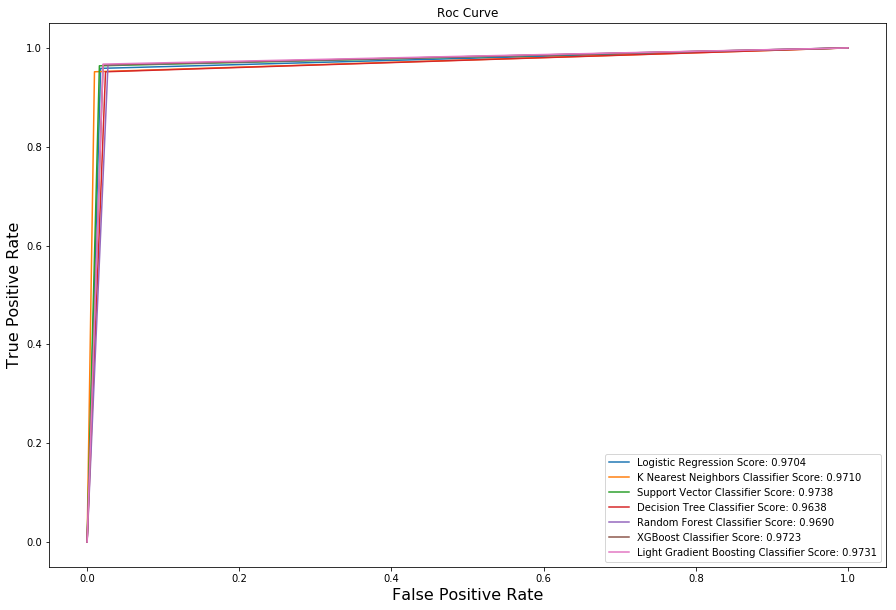

In [29]:
"""#ROC curve"""
from sklearn.metrics import roc_curve,roc_auc_score
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,y_pred_lr3)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc2)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree2)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)
knn_fpr,knn_tpr,rf_threshold=roc_curve(y_test,pred_knn2)
xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,y_pred_xg)
lgb_fpr,lgb_tpr,lgb_threshold=roc_curve(y_test,y_pred)

plt.figure(figsize=(15,10))
plt.title("Roc Curve")
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr3)))
plt.plot(knn_fpr,knn_tpr, label='K Nearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, pred_knn2)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc2)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_dtree2)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(xg_fpr,xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_xg)))
plt.plot(lgb_fpr,lgb_tpr, label='Light Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

Thus we can observe that the SVC has a good ROC score than all other algorithms.

# Conclusion : 
We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. As we can see the LGBClassifier giving an accuracy of 97.33% can be considered as the best model working for prediction of frauds in Credit card transactions.